In [1]:
%reset -f

# Part 1: Initial Setup and Parsing the LAS File


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Path to your LAS file
file_path = './422393367200_WRA-1009_CXD_SEMB.las'

# Lists to hold the depth and log data (multiple logs)
depths = []
log_data = []

# Reading the LAS file manually
data_section = False  # To identify the start of the data section

with open(file_path, 'r') as las_file:
    for line in las_file:
        line = line.strip()  # Remove any leading/trailing whitespace

        # Look for the start of the data section (~A is the standard in LAS files)
        if line.startswith("~A"):
            data_section = True
            continue  # Skip the "~A" line itself

        # If we're in the data section, process the data
        if data_section:
            # Split the data line into components (assuming space-separated values)
            parts = line.split()
            if len(parts) >= 2:  # Ensure there are enough columns
                try:
                    # Convert the first column to depth and the rest to log data
                    depth = float(parts[0])
                    logs = [float(value) for value in parts[1:]]  # Store remaining columns as logs
                    # Only add valid data (exclude -9999 values)
                    if depth != -9999 and all(val != -9999 for val in logs):
                        depths.append(depth)
                        log_data.append(logs)
                except ValueError:
                    # Handle any lines that don't contain valid data
                    continue

# Convert to numpy arrays
depths = np.array(depths, dtype="float32")

# Convert depth from feet to meters (1 foot = 0.3048 meters)
depths = depths * 0.3048

log_data = np.array(log_data, dtype="float32")




In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the formation tops in meters
formations = [
    
    {"name": "Glasscock", "top": 5465.68 * 0.3048},
    {"name": "Glasscock Base", "top": 5521.79 * 0.3048}
  
]

# Part 2: Visualizing All Log Data

## Density Log

No handles with labels found to put in legend.


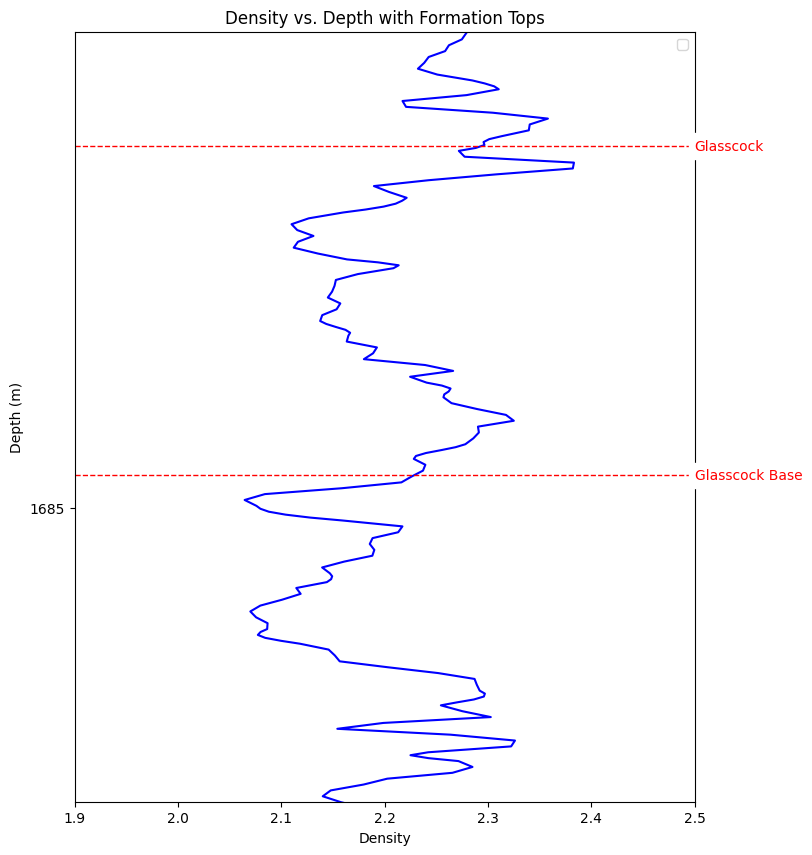

In [4]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_DEN = log_data[:, 3]  # Customize this based on your parameter names and number of column

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))
plt.plot(log_DEN, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter
plt.xlim(1.9, 2.5)

# Set y-axis range for depth
plt.ylim(1910, 1500)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Density')
plt.ylabel('Depth (m)')

plt.ylim(1700, 1660)

plt.title('Density vs. Depth with Formation Tops')
plt.legend()
plt.show()


## Neutron Porosity Log

No handles with labels found to put in legend.


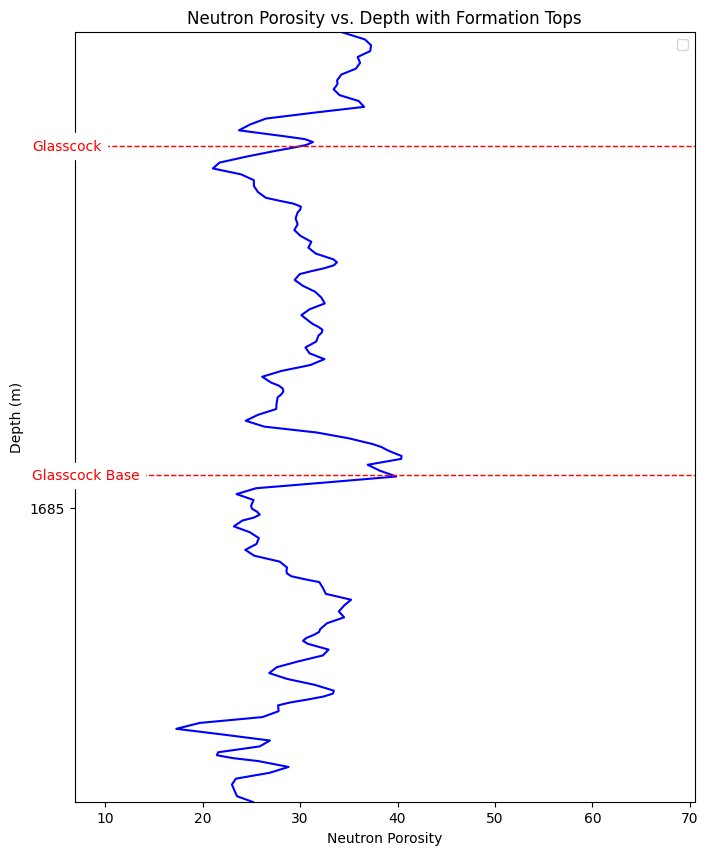

In [5]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_NPRL = log_data[:, 13] # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))
plt.plot(log_NPRL, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Neutron Porosity')
plt.ylabel('Depth (m)')

plt.ylim(1700, 1660)

plt.title(f'Neutron Porosity vs. Depth with Formation Tops')
plt.legend()
plt.show()


## Gamma Ray Log

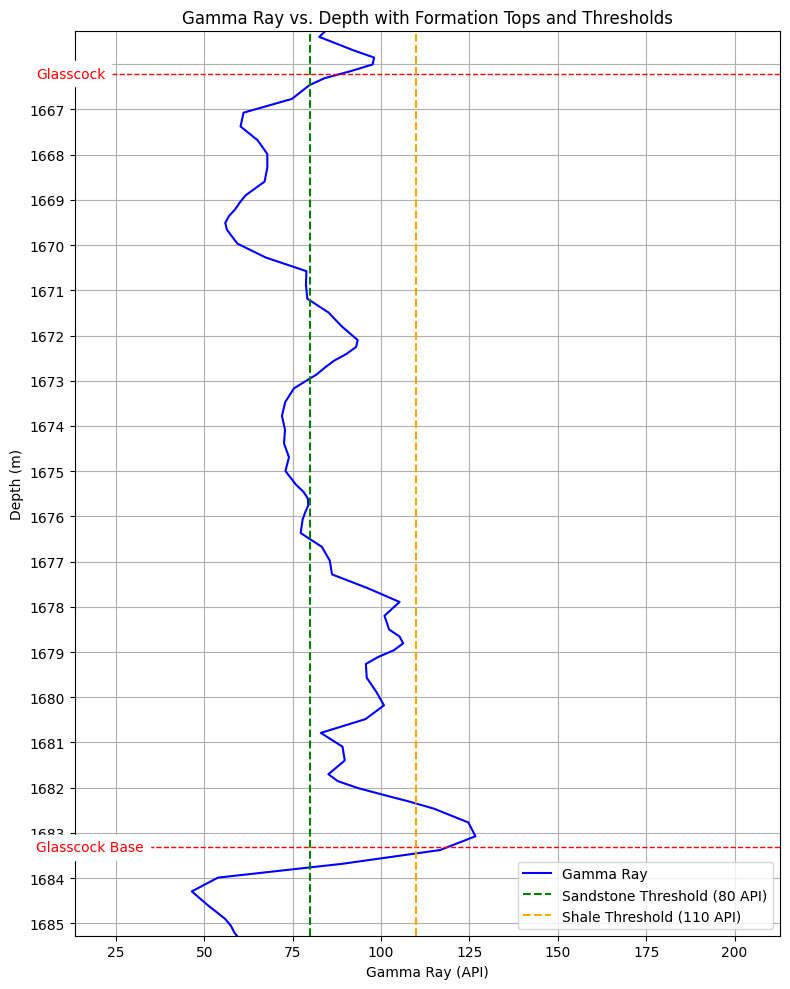

In [6]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_GRGC = log_data[:, 11]  # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))

# Plot the Gamma Ray log against depth
plt.plot(log_GRGC, depths, color='blue', label='Gamma Ray')

# Invert the y-axis to have depth increase downwards (common in well logging)
plt.gca().invert_yaxis()

# Set y-axis range for depth (adjust based on your depth range)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Mark Gamma Ray thresholds for sandstone and shale
gr_sandstone_threshold = 80  # Gamma Ray value for sandstone
gr_shale_threshold = 110  # Gamma Ray value for shale

# Add vertical lines to mark these thresholds
plt.axvline(x=gr_sandstone_threshold, color='green', linestyle='--', label='Sandstone Threshold (80 API)')
plt.axvline(x=gr_shale_threshold, color='orange', linestyle='--', label='Shale Threshold (110 API)')

# Set depth ticks for y-axis at 1 meter intervals
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 1  # Set the interval to 1 meter
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Gamma Ray (API)')
plt.ylabel('Depth (m)')
plt.ylim(1685, 1665)  # Example limits, adjust as needed

# Title and legend
plt.title(f'Gamma Ray vs. Depth with Formation Tops and Thresholds')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


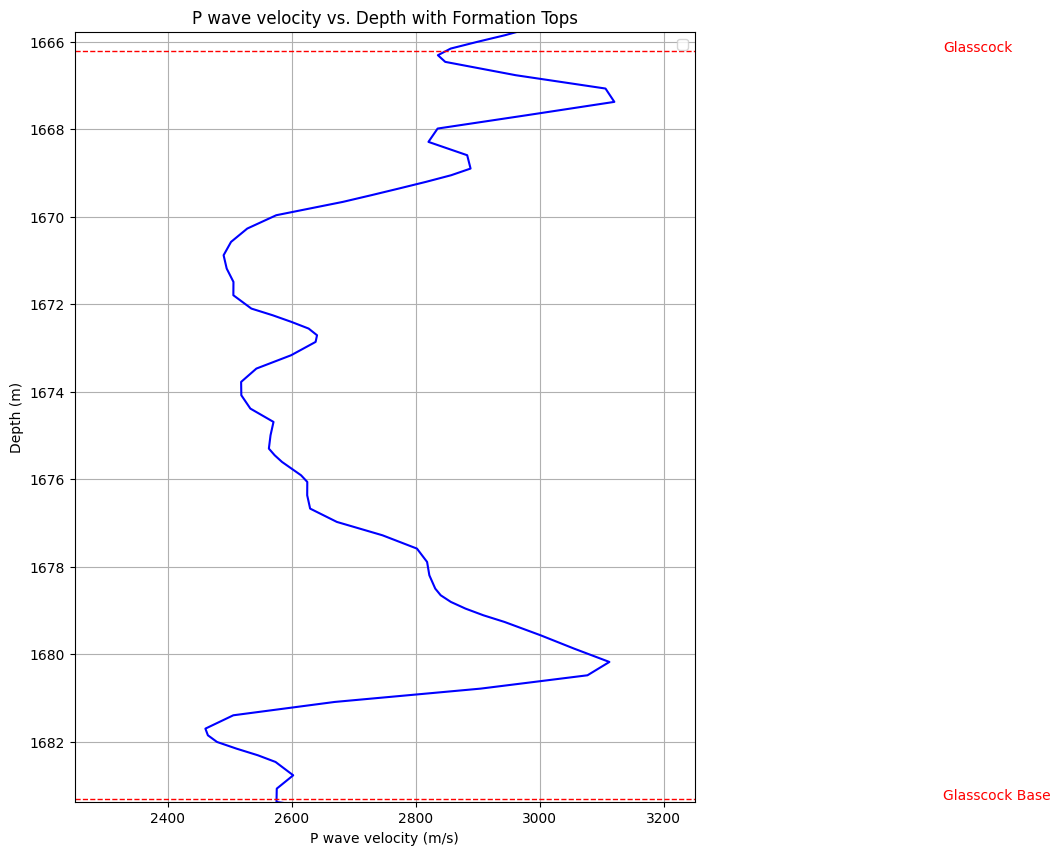

In [7]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_DTC = log_data[:, 5]  # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))
plt.plot(1e6 * 0.3048 / log_DTC, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(3650, formation['top'], formation['name'], 
             fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 2  # Adjusted the interval for finer depth ticks
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('P wave velocity (m/s)')
plt.ylabel('Depth (m)')

plt.ylim(1683.1, 1665.5)  # Example limits, adjust as needed
plt.xlim(2250, 3250)  # Example limits, adjust as needed
plt.title('P wave velocity vs. Depth with Formation Tops')
plt.grid()
plt.legend()
plt.show()


# Shale Porosity computation

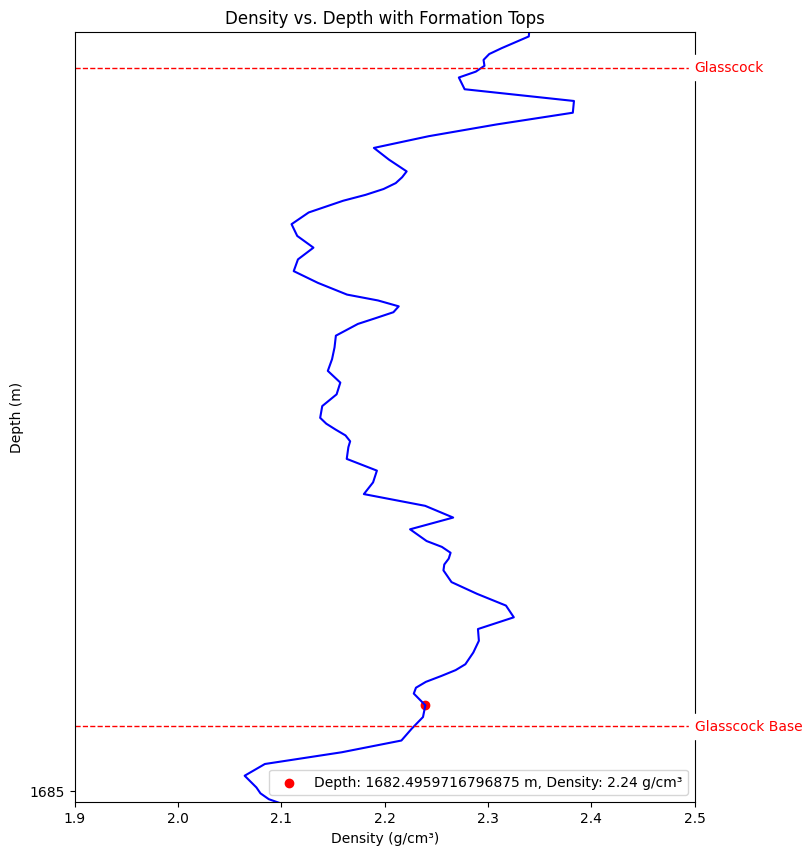

At depth 1682.5 m, the density is 2.24 g/cm³


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the depth of interest (1683 m)
target_depth = 1682.5

# Find the closest depth index in the depths array
closest_depth_index = np.argmin(np.abs(depths - target_depth))

# Get the corresponding depth and density value
closest_depth = depths[closest_depth_index]
closest_density = log_DEN[closest_depth_index]

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))
plt.plot(log_DEN, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Highlight the point at the target depth
plt.scatter(closest_density, closest_depth, color='red', label=f'Depth: {closest_depth} m, Density: {closest_density:.2f} g/cm³')

# Set x-axis range based on the selected parameter
plt.xlim(1.9, 2.5)

# Set y-axis range for depth
plt.ylim(1910, 1500)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Density (g/cm³)')
plt.ylabel('Depth (m)')
plt.ylim(1685, 1665)  # Example limits, adjust as needed

plt.title('Density vs. Depth with Formation Tops')

# Add the legend
plt.legend()

# Show the plot
plt.show()

# Print the exact density value at 1683 m
print(f"At depth {target_depth} m, the density is {closest_density:.2f} g/cm³")


In [9]:
import numpy as np

# Matrix and fluid densities (adjust based on your formation)
rho_matrix = 2.55  # Matrix density of shale (g/cm³)
rho_fluid = 0.69  # Fluid density of oil (g/cm³)

# Bulk density from the density log in shale zone
rho_bulk_shale = 2.24  # Replace with your actual density log data for shale region

# Compute shale porosity
phi_shale = (rho_matrix - rho_bulk_shale) / (rho_matrix - rho_fluid)

# Print or plot the results
print(f"Shale Porosity: {phi_shale}")


Shale Porosity: 0.16666666666666646


In [10]:
import numpy as np
import pandas as pd

# Define matrix and fluid densities
rho_matrix = 2.65  # For sandstone, for example
rho_fluid = 0.85      # For water, assuming the formation contains water

# Assuming log_DEN is your bulk density log
bulk_density = log_DEN  # Replace with the actual column from your data

# Calculate porosity from density
porosity_density = (rho_matrix - bulk_density) / (rho_matrix - rho_fluid)



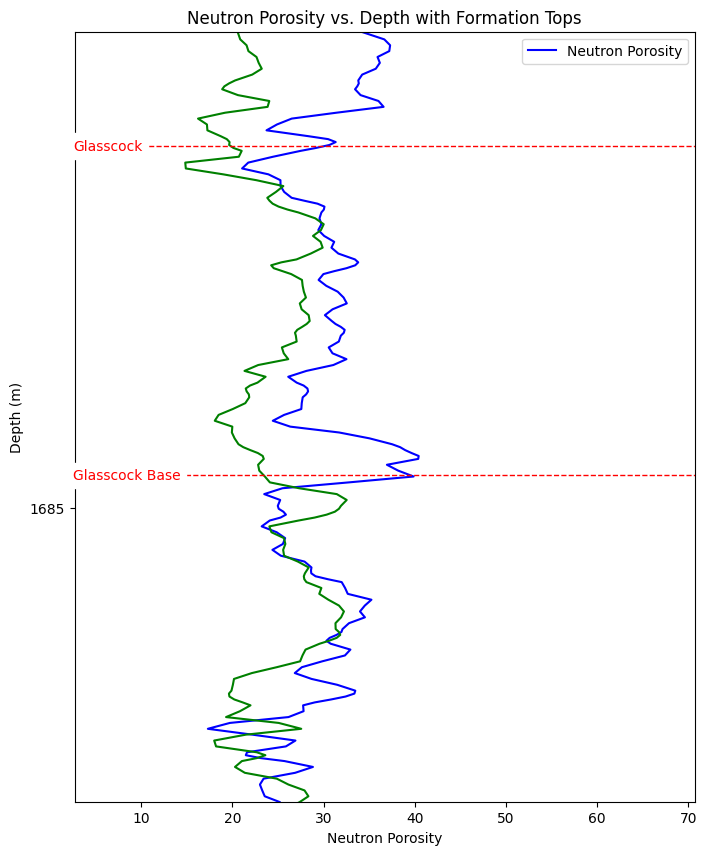

In [11]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_NPRL = log_data[:, 13] # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))


plt.plot(log_NPRL, depths, color='blue', label='Neutron Porosity')

plt.plot(porosity_density*100, depths, color='green')


plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Neutron Porosity')
plt.ylabel('Depth (m)')

plt.ylim(1700, 1660)

plt.title(f'Neutron Porosity vs. Depth with Formation Tops')
plt.legend()
plt.show()





In [12]:
# Define your depth range (in meters) for which you want to find the min and max values
depth_min_range = 1660  # Adjust this value based on your range
depth_max_range = 1690  # Adjust this value based on your range

# Filter the data to include only values within the specified depth range
depth_filter = (depths >= depth_min_range) & (depths <= depth_max_range)
log_GRGC_filtered = log_GRGC[depth_filter]

# Compute the min and max of the filtered gamma-ray values
GR_min_range = np.min(log_GRGC_filtered)
GR_max_range = np.max(log_GRGC_filtered)

# Print the results
print(f"Gamma Ray Min (in range {depth_min_range}m - {depth_max_range}m): {GR_min_range}")
print(f"Gamma Ray Max (in range {depth_min_range}m - {depth_max_range}m): {GR_max_range}")


Gamma Ray Min (in range 1660m - 1690m): 46.45209884643555
Gamma Ray Max (in range 1660m - 1690m): 126.69599914550781


In [13]:
# Example data (adjust according to your log data)
log_GRGC = log_data[:, 11]  # Gamma Ray log (log_GRGC)
log_porosity_total = porosity_density  # Replace X with the column index of porosity_density
GR_min = 46.452  # Gamma Ray value for clean sandstone
GR_max = 126.695999  # Gamma Ray value for pure shale

# 1. Calculate Gamma Ray Index (GRI)
I_GR = (log_GRGC - GR_min) / (GR_max - GR_min)

# 2. Calculate Volume of Shale (Vsh) for compacted formations (use the more complex formula)
Vsh = 0.083 * (2**(3.7 * I_GR) - 1)
# Ensure Vsh does not exceed 1 or drop below 0 (to account for outliers in the gamma-ray log)
Vsh = np.clip(Vsh, 0, 1)

# 3. Calculate Effective Porosity
# Effective porosity = Total porosity * (1 - Vsh)
# porosity_eff = log_porosity_total * (1 - Vsh)
porosity_eff = log_porosity_total - Vsh * 0.1667


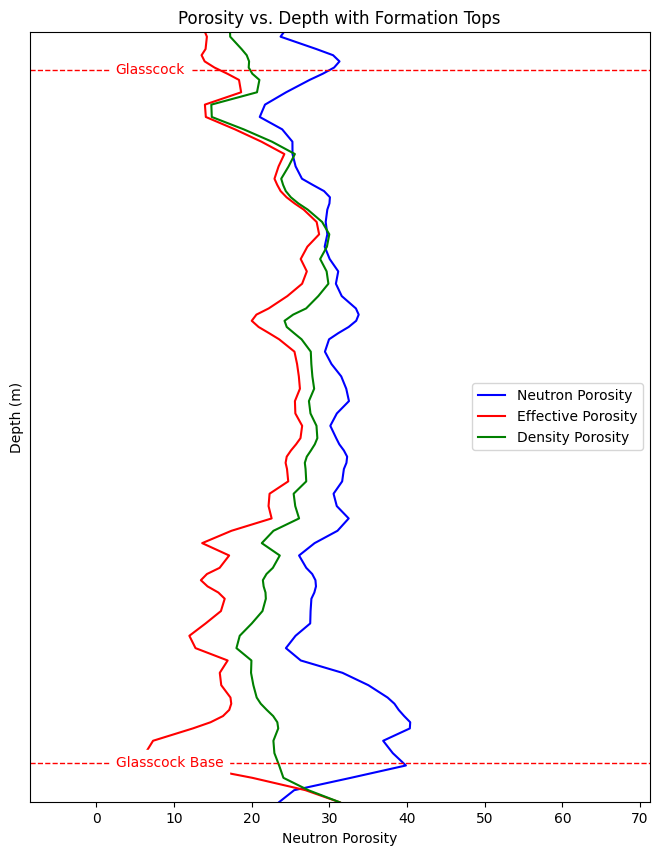

In [14]:
# Plotting the selected log against depth
plt.figure(figsize=(8, 10))


plt.plot(log_NPRL, depths, color='blue', label='Neutron Porosity')
plt.plot(porosity_eff*100, depths, color='red', label='Effective Porosity')

plt.plot(porosity_density*100, depths, color='green', label='Density Porosity')


plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Neutron Porosity')
plt.ylabel('Depth (m)')

plt.ylim(1684, 1665)

plt.title('Porosity vs. Depth with Formation Tops')
plt.legend()
plt.show()


In [15]:
zdep=5521
# Compute pressure and temperature in the reservoir
print(0.5 * zdep  - 600) # Pressure in psi
print(0.433 * zdep) # Pressure in psi
print(0.47 * zdep ) # Pressure in psi

print(0.0095773 * zdep + 22.734)

2160.5
2390.593
2594.87
75.6102733
